####  Importing the required libraries

In [3]:
from fbprophet import Prophet
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook as tqdm
import _pickle as pickle

#### Loading ethereum dataset "eth.csv" into variable df

In [31]:
df = pd.read_csv("C:/Users/sivay/Downloads/eth.csv")

#### Checking the columns

In [32]:
df.head()
df.columns

Index(['date', 'AdrActCnt', 'BlkCnt', 'BlkSizeByte', 'BlkSizeMeanByte',
       'CapMrktCurUSD', 'DiffMean', 'FeeMeanNtv', 'FeeMeanUSD', 'FeeMedNtv',
       'FeeMedUSD', 'FeeTotNtv', 'FeeTotUSD', 'HashRate', 'IssContNtv',
       'IssContPctAnn', 'IssContUSD', 'IssTotNtv', 'IssTotUSD', 'NVTAdj',
       'NVTAdj90', 'PriceBTC', 'PriceUSD', 'ROI1yr', 'ROI30d', 'SplyCur',
       'TxCnt', 'TxTfrCnt', 'TxTfrValAdjNtv', 'TxTfrValAdjUSD',
       'TxTfrValMeanNtv', 'TxTfrValMeanUSD', 'TxTfrValMedNtv',
       'TxTfrValMedUSD', 'TxTfrValNtv', 'TxTfrValUSD', 'VtyDayRet180d',
       'VtyDayRet30d', 'VtyDayRet60d'],
      dtype='object')

#### Removing the unnecessary columns

In [33]:
df=df[['date','PriceUSD']]

#### Plotting the graph

<AxesSubplot:>

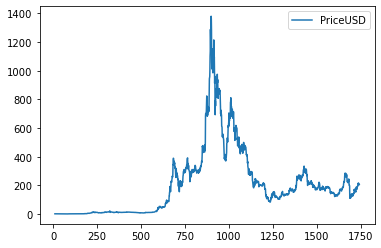

In [34]:
df.plot()

#### Converting the date column to date and time

In [35]:
df['date'] = pd.to_datetime(df['date'])

#### Printing the dataframe

In [36]:
print(df.head())

        date  PriceUSD
0 2015-07-30       NaN
1 2015-07-31       NaN
2 2015-08-01       NaN
3 2015-08-02       NaN
4 2015-08-03       NaN


#### Checking for null values

In [37]:
print(df.info())
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1742 entries, 0 to 1741
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      1742 non-null   datetime64[ns]
 1   PriceUSD  1733 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 27.3 KB
None


date        0
PriceUSD    9
dtype: int64

#### Dropping of the null values and reindexing

In [38]:
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)

#### Printing the dataframe

In [39]:
df

,date,PriceUSD
0,2015-08-08,1.199990
1,2015-08-09,1.199990
2,2015-08-10,1.199990
3,2015-08-11,0.990000
4,2015-08-12,1.288000
...,...,...
1728,2020-05-01,212.713618
1729,2020-05-02,214.133871
1730,2020-05-03,210.090575
1731,2020-05-04,206.961927


#### Renaming the date and Price columns as required, Fitting the model and predicting the present and future along with plotting it
#### Please refer the facebook prophet parameters to understand the model and its parameters. Here I considered daily seasonlity, yearly seasonality and weekly seasonality.

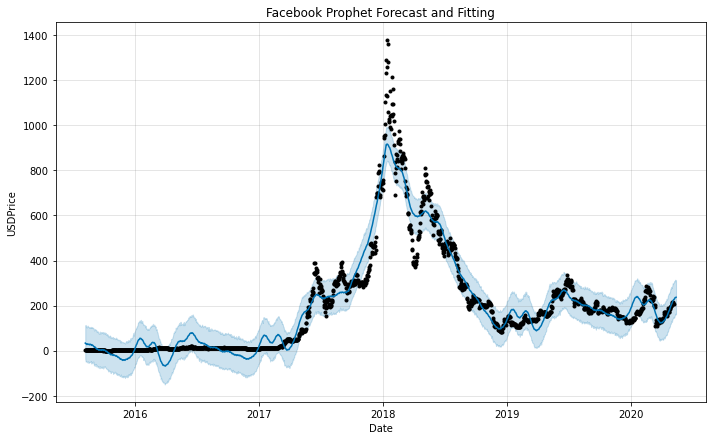

In [120]:
df.rename(columns={'date': 'ds', 'PriceUSD': 'y'}, inplace=True)

# Fitting and training
mod = Prophet(daily_seasonality=True, yearly_seasonality=True, weekly_seasonality=True )
mod.fit(df)

# Setting up predictions to be made
future = mod.make_future_dataframe(periods=7, freq='D')
# Making predictions
forecast = mod.predict(future)

# Plotting the model
mod.plot(forecast,xlabel='Date',ylabel='USDPrice')
plt.title('Facebook Prophet Forecast and Fitting')
plt.show()


The black dots in the above plot are the actual values. The blue line is the predicted values and the blue area is the confidence interval

#### Making forecast for the next 7 days. You can also see the lower interval and the upper interval of the confidence interval. The predictions are actually accurate. They are falling within the confidence interval.

In [125]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(7)
#6 #202.7360756
#7 #212.9909728
#8 #212.4131
#9 #210.7749
#10 #187.5424868
#11#185.715372296902
#12 #189.8184594


,ds,yhat,yhat_lower,yhat_upper
1733,2020-05-06,227.635481,145.876113,303.758112
1734,2020-05-07,228.448511,147.962995,309.070225
1735,2020-05-08,231.332229,154.514590,306.829403
1736,2020-05-09,234.849101,159.421055,314.539915
1737,2020-05-10,235.504357,164.523629,314.573790
1738,2020-05-11,235.744637,160.038859,313.566272
1739,2020-05-12,236.976783,161.716125,311.593056


#### Plotting the components - Trend, (weekly, yearly, daily) seasonality 

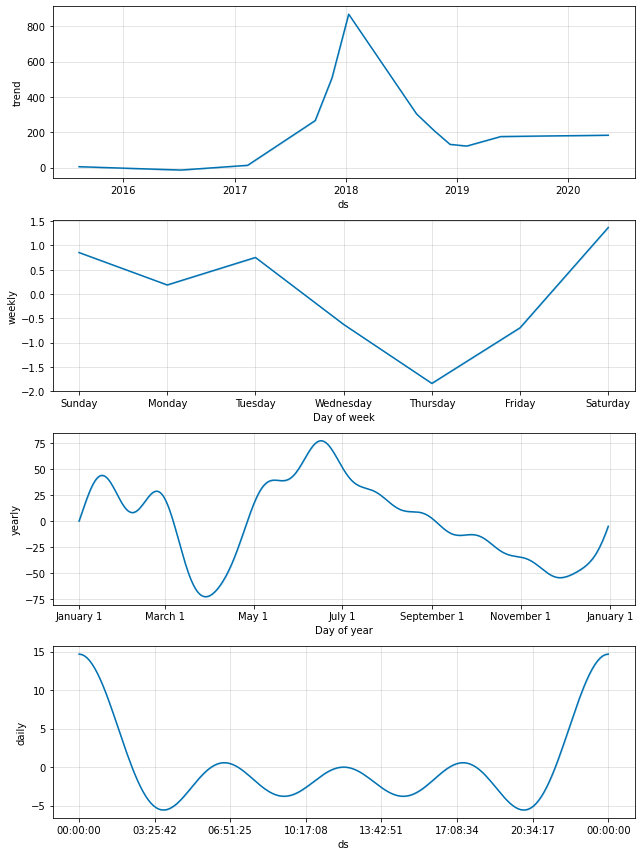

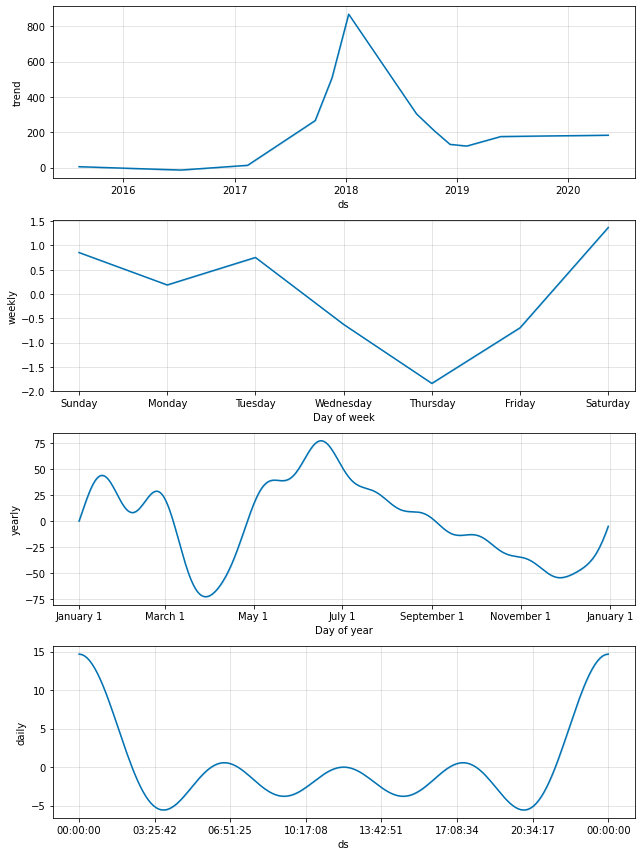

In [122]:
mod.plot_components(forecast)

In [ ]:
predicts=mod.predict(df)
predicts['yhat'].head()

#### Printing the performance metrics (Price USD which is Y vs yhat which are the predicted values)

In [119]:
import sklearn.metrics as metrics
mae = metrics.mean_absolute_error(df.y, predicts['yhat'])
mse = metrics.mean_squared_error(df.y, predicts['yhat'])
rmse = np.sqrt(mse) # or mse**(0.5)  
r2 = metrics.r2_score(df.y,predicts['yhat'])

print("Results of sklearn.metrics:")
print("MAE:",mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-Squared:", r2)
 

Results of sklearn.metrics:
MAE: 41.12925595565841
MSE: 3631.681428465201
RMSE: 60.26343359339228
R-Squared: 0.9328882784365026
